In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'JPM'
df = pd.DataFrame()
df[ticker] = web.DataReader(ticker, 'yahoo', '2010-01-01')['Adj Close']

In [3]:
log_returns = np.log(1 + df.pct_change())

In [4]:
log_returns.tail()

,JPM
Date,
2019-09-26,-0.008254
2019-09-27,0.005879
2019-09-30,-0.000255
2019-10-01,-0.018351
2019-10-02,-0.020106


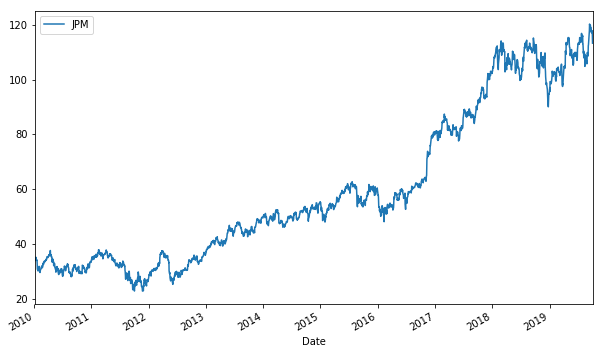

In [5]:
df.plot(figsize=(10,6))

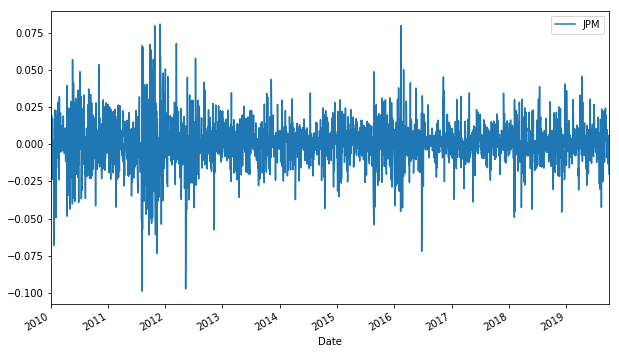

In [6]:
log_returns.plot(figsize=(10,6))

In [7]:
u = log_returns.mean()

In [8]:
var = log_returns.var()

In [9]:
std = log_returns.std().values

In [10]:
drift = (u - var / 2).values

In [11]:
time_intervals = 1000

In [12]:
iterations = 10

In [13]:
z = norm.ppf(np.random.rand(time_intervals, iterations))

In [14]:
daily_returns = np.exp(drift + std * z)

In [15]:
s0 = df.iloc[-1]

In [16]:
price_list = np.zeros_like(daily_returns)

In [17]:
price_list[0] = s0

In [18]:
for i in range(1, len(price_list)):
    price_list[i] = price_list[i-1] * daily_returns[i]

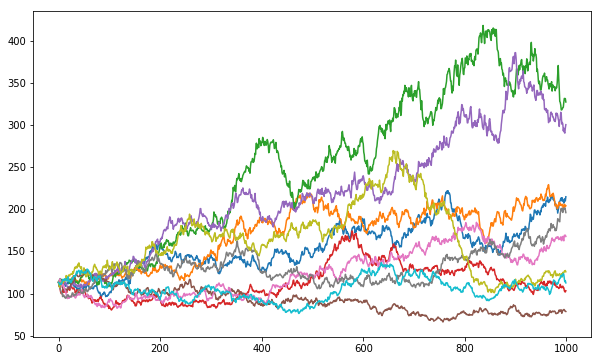

In [19]:
plt.figure(figsize=(10,6))
plt.plot(price_list)